In [1]:
import pandas as pd
from sklearn import neural_network as nn
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=False)
from sklearn import neural_network as nn
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, KFold
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Permuted Data")
df

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,Standardized_SMILES,pchembl_value,MolWt,LogP,QED
0,NC(=O)c1c(-c2ccc(NC(=O)c3cccc(C(F)(F)F)c3)cc2)...,5.34,576.601,3.44580,0.304138
1,CCCCNC(=O)Nc1ccc(Oc2ncnc3cc(OC)c(OC)cc23)cc1,6.40,396.447,4.36090,0.549502
2,CC(=O)Nc1cn2nc(Oc3cccc(NC(=O)c4cccc(F)c4)c3)cc...,8.96,405.389,3.87140,0.525306
3,COc1cc(OC)cc(-c2cc3c[nH]c(=NCCCCO)cc3[nH]c2=NC...,8.10,467.570,3.26220,0.398199
4,Cc1cccc(NC(=O)Nc2ccc(-c3csc4[nH]cnc(=N)c34)cc2...,7.72,393.447,4.86239,0.399977
...,...,...,...,...,...
1636,Cc1[nH]nc2nccc(-c3ccc(NC(=O)Nc4cccnc4)cc3)c12,5.51,344.378,3.97232,0.523798
1637,O=C(Nc1ccc(F)cc1)C1(C(=O)Nc2ccc(Oc3cc[nH]c(=Nc...,6.59,501.493,5.07000,0.307360
1638,CCOC(=O)N=c1s[nH]c(-c2ccc(NC(=O)Nc3cc(C)ccc3F)...,7.30,457.487,3.99082,0.459966
1639,O=C(CSc1nc2ccccc2n2cnnc12)Nc1ccc(C(=O)N=c2ccc(...,8.41,489.948,3.73090,0.363128


In [2]:
# Generate Morgan Fingerprints
def generate_fingerprints(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits))
    else:
        return np.zeros((nBits,))

df['Fingerprints'] = df['Standardized_SMILES'].apply(generate_fingerprints)

# Prepare features and target
X = np.array(list(df['Fingerprints']))
y = df['pchembl_value'].values

In [3]:
smiles = df['Standardized_SMILES'].values

In [4]:
MolWt = df['MolWt'].values
LogP = df['LogP'].values
QED=df['QED'].values

In [5]:
df

,Standardized_SMILES,pchembl_value,MolWt,LogP,QED,Fingerprints
0,NC(=O)c1c(-c2ccc(NC(=O)c3cccc(C(F)(F)F)c3)cc2)...,5.34,576.601,3.44580,0.304138,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CCCCNC(=O)Nc1ccc(Oc2ncnc3cc(OC)c(OC)cc23)cc1,6.40,396.447,4.36090,0.549502,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CC(=O)Nc1cn2nc(Oc3cccc(NC(=O)c4cccc(F)c4)c3)cc...,8.96,405.389,3.87140,0.525306,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,COc1cc(OC)cc(-c2cc3c[nH]c(=NCCCCO)cc3[nH]c2=NC...,8.10,467.570,3.26220,0.398199,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Cc1cccc(NC(=O)Nc2ccc(-c3csc4[nH]cnc(=N)c34)cc2...,7.72,393.447,4.86239,0.399977,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
1636,Cc1[nH]nc2nccc(-c3ccc(NC(=O)Nc4cccnc4)cc3)c12,5.51,344.378,3.97232,0.523798,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1637,O=C(Nc1ccc(F)cc1)C1(C(=O)Nc2ccc(Oc3cc[nH]c(=Nc...,6.59,501.493,5.07000,0.307360,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1638,CCOC(=O)N=c1s[nH]c(-c2ccc(NC(=O)Nc3cc(C)ccc3F)...,7.30,457.487,3.99082,0.459966,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1639,O=C(CSc1nc2ccccc2n2cnnc12)Nc1ccc(C(=O)N=c2ccc(...,8.41,489.948,3.73090,0.363128,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
#Now incorporate this sort of noise into df during the training

In [7]:
X.shape

(1641, 2048)

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from math import sqrt

def perform_fcv(X, y, smiles, k=10, sort_by=None, additional_info=None):
    false_discovery=list()
    true_discovery=list()
    true_ignore=list()
    false_ignore=list()
    if sort_by is not None:
        idx = np.argsort(sort_by)
        X, y, smiles = X[idx], y[idx], [smiles[i] for i in idx]
        if additional_info is not None:
            additional_info = [additional_info[i] for i in idx]
    train_df=pd.DataFrame()
    test_df=pd.DataFrame()
    rmse=list()
    predictions_all = []  # List to store all predictions
    true_values_all = []  # List to store all true values
    smiles_all = []       # List to store SMILES for each test sample
    sort_by_all = []      # List to store sort_by values for each test sample

    total_samples = len(X)
    fold_size = total_samples // k
    remainder = total_samples % k
    threshold=0
    
    for i in range(k-1):
        start = (i+1) * fold_size
        stop = ((i+1) + 1) * fold_size if (i+2) < k else total_samples
        
        X_train = np.vstack([X[:start]])
        y_train = np.concatenate([y[:start]])
        model = nn.MLPRegressor(hidden_layer_sizes=(min(25,round(np.sqrt(X_train.shape[0])),)), random_state=42)
                                      
        X_test = X[start:stop]
        y_test = y[start:stop]
        smiles_test = smiles[start:stop]
        sort_by_test = additional_info[start:stop] if additional_info is not None else y[start:stop]

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(stats.pearsonr(y_test, predictions))
        
        
        discoveries=pd.DataFrame({'Standardized_SMILES': smiles_test,'actual':y_test ,'predictions':predictions})
        discoveries.plot.scatter(x="actual",y="predictions",)#gonna subset this
        threshold=5.2 #previous max; discoveries defined as those who are predicted to be more than this
        discoveries=discoveries.query("predictions<@threshold")
        falses=discoveries.query("actual>@threshold")
        trues=discoveries.query("actual<@threshold")
        #print(discoveries.shape)
        false_discovery.append(falses)
        true_discovery.append(trues)
        
        discoveries=pd.DataFrame({'Standardized_SMILES': smiles_test,'actual':y_test ,'predictions':predictions})#gonna subset this
        threshold=5.2 #previous max; discoveries defined as those who are predicted to be more than this
        discoveries=discoveries.query("predictions>@threshold")
        #print(discoveries.shape)
        falses=discoveries.query("actual<@threshold")
        trues=discoveries.query("actual>@threshold")
        
        false_ignore.append(falses)
        true_ignore.append(trues)
        
        rmse.append(np.sqrt(mean_squared_error(y_test, predictions)))
        smiles_train=np.concatenate([smiles[:start]])
        training_df=pd.DataFrame({
            'Standardized_SMILES': smiles_train,
        'True Values': y_train,
        'Predictions': model.predict(X_train)
        })
        
        training_df.insert(0,'training batch',(i+1))
        train_df=pd.concat([train_df,training_df]).reset_index(drop=True)
        testing_df=pd.DataFrame({
            'Standardized_SMILES': smiles_test,
        'True Values': y_test,
        'Predictions': predictions
        })
        testing_df.insert(0,'testing batch',(i+1))
        test_df=pd.concat([test_df,testing_df]).reset_index(drop=True)
        
        
        print(trues)
        predictions_all.extend(predictions.tolist())
        true_values_all.extend(y_test.tolist())
        smiles_all.extend(smiles_test)
        sort_by_all.extend(sort_by_test)

    
    # Saving to CSV (optional)
    train_df.to_csv("unsorted_fcv_results_MLP_training batches.csv", index=False)
    test_df.to_csv("unsorted_fcv_results_MLP_testing batches.csv", index=False)
    results_df = pd.DataFrame({
        'Standardized_SMILES': smiles_all,
        'True Values': true_values_all,
        'Predictions': predictions_all,
        
    })

    # Return the DataFrame for further use or analysis
    return results_df,false_discovery,true_discovery, true_ignore, false_ignore,rmse

In [9]:

# Execute FCV sorted by target values (or another sorting metric if applicable)
results_df, false_disc, true_disc, true_ignore, false_ignore,rmse = perform_fcv(X, y, smiles, sort_by=None, additional_info=df["QED"])

/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.6216284358449911, 6.551334038451952e-19)
                                   Standardized_SMILES  actual  predictions
1    N=c1[nH][nH]c2cccc(-c3ccc(NC(=O)Nc4cc(C(F)(F)F...    7.05     7.501607
3    CCn1c2ccc(C3CCCCO3)cc2c2c3c(c4c(c21)CCc1c-4cnn...    8.05     7.481994
4      Clc1ccc(C(C=Cc2ccccc2)=NN=c2[nH]ncc3ccccc23)cc1    9.16     6.217846
5       CCOC(=O)Nc1ccc(N=c2[nH]cnc3sc4c(c23)CCCC4)cc1C    5.50     6.081602
6    CCCCNC(=O)Nc1ccc(N(C)c2cc[nH]c(=Nc3cccc(CS(C)(...    7.54     6.829683
..                                                 ...     ...          ...
158  CC1(c2cc(=NC(=O)n3ccc4cc(Oc5ncnc6c5CNC6)ccc43)...    7.85     7.020297
159  CON=Cc1ccc2[nH]c3c4c(c5c(c3c2c1)CNC5=O)-c1cn(C...    7.75     6.941463
160  COC(=O)c1ccc(-c2n[nH]c(=Nc3ccc(Cl)cc3)c3ccccc2...    6.44     5.756365
161    Cc1cncc(NC(=O)n2ccc3cc(Oc4ncnc5c4CCNC5)ccc32)c1    6.55     7.584443
163  Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...    8.37     7.650213

[144 rows x 3 columns]


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.6185853311771561, 1.0817119066832813e-18)
                                   Standardized_SMILES  actual  predictions
2                  O=C(Nc1ccc(Br)cc1)c1scnc1CCc1ccncc1    6.07     6.149447
3    Cc1cccc(NC(=O)Nc2ccc(-c3ccc(NC(=O)c4ccccc4)c4c...    6.33     6.705208
4    Cc1nn(-c2cc[nH]c(=Nc3ccc4c(ccn4C)c3)n2)cc1CN1C...    5.77     5.781826
5    Cn1cc(N=c2[nH]cc(C(F)(F)F)c(=NC3CC4CCC3C4)[nH]...    6.08     5.692086
6    COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2cc[nH]c(=Nc3ccc...    6.64     7.623622
..                                                 ...     ...          ...
159   O=C(Nc1ccc(Cc2ccccc2)cc1)c1ccccc1Cn1ccc2ncnc-2c1    5.67     6.389596
160                OCc1cccc(N=c2[nH]cc(-c3ccccc3)o2)c1    6.30     6.036562
161  CC1Nc2c(-c3c(O)[nH]c4ccc(F)cc34)cccc2C1C(=O)NC...    8.52     8.428209
162  COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(C)cc5)cccc4c3...    9.30     8.662343
163  COc1cccc(NC(=O)Nc2ccc(N=c3[nH]cnc4cc(OC)c(OC)c...    5.21     7.514109

[147 rows x 3 columns]


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.7290460179296887, 1.8126863684424904e-28)
                                   Standardized_SMILES  actual  predictions
0    O=C(c1ccc(-c2n[nH]c(=Nc3ccc(OC(F)(F)Cl)cc3)c3c...    5.31     6.870890
1    COc1ccc2[nH]c(O)c(N=NC(=O)c3ccc(NC(=O)Nc4ccc(C...    6.25     6.306441
3    CC(C)(C)c1ccc(N=c2[nH]nc(-c3cccnc3CCc3ccncc3)o...    7.37     6.732038
4     CN(C)CCOc1ccc(NC(=O)c2cccc(-c3cccc(O)c3)c2)cc1Cl    7.56     7.078640
5    CONC(=O)c1cc(N=c2[nH]cnn3cc(NC(=O)OCC4CCCO4)c(...    7.24     8.516666
..                                                 ...     ...          ...
157  Cc1cccc(NC(=O)Nc2cccc(-c3csc4cc[nH]c(=N)c34)c2)c1    6.60     7.510892
158  O=C(Nc1ccc(OC(F)(F)Cl)cc1)c1ccccc1Cn1ccc2ncnc-2c1    7.02     7.007172
159          O=C(Nc1ccc(Br)cc1)c1ccccc1Cn1ccc2ncnc-2c1    6.42     6.474794
161   O=C(Nc1cccc(Oc2ccc3nc(NC(=O)C4CC4)cn3n2)c1)C1CC1    7.92     7.322090
163  COc1cc2[nH]cnc(=Nc3ccc(NC(=O)c4c(F)cccc4F)cc3)...    6.24     6.069182

[148 rows x 3 columns]


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.6821762215026392, 8.556817085663447e-24)
                                   Standardized_SMILES  actual  predictions
0           Cn1ccc2ncnc(Oc3ccc(NC(=O)Nc4ccccc4)cc3)c21    7.48     6.664012
1        CN=c1cc(Oc2ccc(NC(=O)Nc3cccc(C)c3)cc2)[nH]cn1    6.10     6.937889
2    Cc1nn(-c2[nH]c(=Nc3ccc4c(c3)c(Cl)c(C)n4C)ncc2F...    6.00     6.946140
3    CN=c1nc2ccc(-c3cc(C(=O)Nc4cccc5c4CCC5)ccc3C)cc...    7.32     8.105069
4    O=C(CSc1nc2ccccc2n2cnnc12)Nc1ccc(C(=O)Nc2ccccc...    8.47     7.136554
..                                                 ...     ...          ...
159  COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)c(C(F)(F)F...    9.00     9.453024
160  CC(C)Cn1c2ccc(C3CCCCO3)cc2c2c3c(c4c(c21)CCc1nn...    7.96     7.682576
161      CCc1cc(O)c(F)cc1-c1cc(NCCCO)c2[nH]c(=N)ncc2c1    6.00     6.440591
162  O=C(Nc1ccc(Oc2cc(=O)[nH]cn2)cc1)Nc1cccc(C(F)(F...    5.50     6.923092
163  COc1ccc(-c2cc(NC(=O)N=c3cc[nH]cc3)cc(C(F)(F)F)...    6.44     6.760147

[152 rows x 3 columns]


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.7039336685166127, 7.524938010817638e-26)
                                   Standardized_SMILES  actual  predictions
0    CONC(=O)c1cc(N=c2[nH]cnn3cc(-c4nnco4)c(C(C)C)c...    7.11     7.495816
1                CC(C)c1ccc(NC(=O)c2scnc2CCc2cnoc2)cc1    5.79     5.933156
2    Cc1cccc(NC(=O)Nc2ccc(-c3csc4c(-c5ccccc5)c[nH]c...    7.89     7.284852
3    CNS(=O)(=O)c1cc(N=c2[nH][nH]c3cc(-c4cnn(CC(=O)...    6.39     7.720232
4    Cc1nn(-c2cc[nH]c(=Nc3ccc4c(c3)c(Cl)c(C)n4C)n2)...    5.37     6.012013
..                                                 ...     ...          ...
159  CN=c1cc(Oc2ccc(NC(=O)Nc3cccc(C(F)(F)F)c3)cc2C)...    7.20     7.610096
160  O=C(Nc1ccc(Cl)cc1)c1cccc2cc(Oc3ccnc4ccccc34)ccc12    8.40     9.190183
161  FC(F)(F)c1cccc(N=c2[nH]nc(-c3ccncc3CCc3ccncc3)...    6.25     6.395756
162  O=C(CSc1nc2ccccc2n2cnnc12)Nc1ccc(C(=O)NCc2cccc...    7.66     8.142108
163    CC(C)N=c1[nH]c(=Nc2ccc(S(C)(=N)=O)cc2)[nH]cc1Br    7.16     6.513805

[157 rows x 3 columns]


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.7155726482720224, 4.991009402571155e-27)
                                   Standardized_SMILES  actual  predictions
0    O=C(Nc1ccccc1)Nc1ccc(C(=O)N=Nc2c(O)[nH]c3ccccc...    5.36     5.228096
1    O=C(Nc1ccccc1)Nc1ccc(C(=O)N=Nc2c(O)[nH]c3ccc(B...    5.45     5.906849
2    CS(=O)(=O)Cc1cccc(N=c2nc(Oc3ccc(NC(=O)C4(C(=O)...    7.21     7.599140
3    CS(=O)(=O)Cc1cccc(N=c2nc(Oc3ccc(NC(=O)C4(C(=O)...    7.33     7.944933
4    Cc1cccc(NC(=O)N(Cc2ccc(-c3[nH]nc4c3Cc3cc(CN5CC...    7.68     7.711234
..                                                 ...     ...          ...
159  Cc1cccc(C)c1NC(=O)c1ccc(NC(=O)Cn2c(=O)c3nncn3c...    8.17     7.441777
160    CN(C)CCOc1ccc(NC(=O)c2cccc(-c3cccc(O)c3)c2)cc1F    8.70     7.851248
161  Cn1cc(N=c2[nH]cc(C(F)(F)F)c(=NC3C4C=CC(C4)C3C(...    6.58     8.143847
162                  COc1ccccc1N=c1[nH]cc(-c2ccccc2)o1    6.42     5.734889
163  Cn1cc2c(n1)CCc1c-2c2c(c3c4cc(C5CCCCO5)ccc4n(C4...    7.26     7.268771

[159 rows x 3 columns]


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.8027540806090155, 3.2884118099117026e-38)
                                   Standardized_SMILES  actual  predictions
0    CC(=O)N=c1[nH][nH]c2cc(-c3cnn(CC(=O)Nc4ccc(C)c...    8.80     8.170968
1    Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1Oc1ncccc1-c...    7.23     7.431839
2    Cc1cccc(NC(=O)Cc2ccc(-c3csc4cc[nH]c(=N)c34)cc2)c1    7.03     6.321679
3    Cn1cnc(-c2cc(NC(=O)N=c3cc[nH]cc3)cc(C(F)(F)F)c...    6.65     6.363578
4    COc1cc2c(Oc3ccc(N=c4[nH]ccc5[nH]cc(-c6ccc(F)cc...    6.64     6.840909
..                                                 ...     ...          ...
159  Cc1cccc(C)c1OC(=O)N(c1cccc(-c2ccccc2)c1)c1cc[n...    5.72     6.031073
160  Cc1ccc(F)c(NC(=O)Nc2ccc(-c3[nH]sc(=NC(=O)NCCCN...    7.85     7.896177
161  COc1cc2nccc(Oc3ccc4c(C(=O)Nc5cc(Cl)cc(Cl)c5)cc...    9.52     9.149348
162                         NC(=S)NN=c1[nH]ncc2ccccc12    8.12     7.866379
163  COc1cc2nccc(Oc3ccc4c(c3)OCCN4C(=O)NCc3ccc(C)cc...    7.59     9.435468

[151 rows x 3 columns]


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.7747189496794387, 4.527053344679008e-34)
                                   Standardized_SMILES  actual  predictions
0    Cc1ccccc1NC(=O)NCc1ccc(-c2[nH]nc3c2Cc2cc(CN4CC...    6.35     6.051918
1    CCCn1c2ccc(NC(=O)Nc3ccc(Cl)cc3)cc2c2c3c(c4c(c2...    7.32     7.916248
3    NC(=O)C1C2C=CC(C2)C1N=c1[nH]c(=Nc2cnn(C3CCCNC3...    8.70     7.932948
4    COc1cc2nccc(Oc3ccc4c(C(=O)NCC5CC5)cccc4c3)c2cc1OC    7.96     7.801182
5    CCN(CC)CCCCN=c1cc2[nH]c(=NC(=O)NC(C)(C)C)c(-c3...    7.60     6.570808
..                                                 ...     ...          ...
159  COc1cc2[nH]cnc(=Nc3ccc(NC(=O)c4cccc(C(F)(F)F)c...    5.85     6.403402
160              COc1ccc(N=c2[nH]cc(-c3ccccc3)o2)cc1OC    6.85     6.712424
161  Nc1c(-c2nc3cc(OCCN4CCOCC4)ccc3[nH]2)c(=O)[nH]c...    7.18     7.221200
162  Cc1cccc(NC(=O)Nc2ccc(-c3cccc4c3c(=N)[nH]n4C)cc...    7.96     5.709389
163  O=C(Nc1ccc([N+](=O)[O-])cc1)Nc1cccc(CN=c2[nH]c...    5.96     5.962029

[143 rows x 3 columns]


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.760239026351422, 2.3898183137796213e-32)
                                   Standardized_SMILES  actual  predictions
0    COc1cc2nccc(Oc3ccc4c(C(=O)Nc5cccc(C(F)(F)F)c5)...    9.30     9.813349
1    CN(c1ccc(NC(=O)Nc2cc(C(F)(F)F)ccc2F)cc1)c1cc[n...    7.46     8.937476
2    NC(=O)c1ccc(-c2n[nH]c(=Nc3cccc(Br)c3)c3ccccc23...    5.92     6.576111
4       CC(C)(C)c1ccc(NC(=O)c2ccccc2Cn2ccc3cnccc32)cc1    7.28     7.032615
6       N#Cc1cccc(NC(=O)Nc2ccc(-c3cccc4c3CNC4=O)cc2)c1    6.43     6.419026
..                                                 ...     ...          ...
159  Cc1cccc(NC(=O)N(Cc2ccc(-c3[nH]nc4c3Cc3cc(CN5CC...    6.91     7.274189
161  O=C(Nc1ccc(F)cc1)C1(C(=O)Nc2ccc(Oc3cc[nH]c(=Nc...    6.59     6.768069
162  CCOC(=O)N=c1s[nH]c(-c2ccc(NC(=O)Nc3cc(C)ccc3F)...    7.30     7.587463
163  O=C(CSc1nc2ccccc2n2cnnc12)Nc1ccc(C(=O)N=c2ccc(...    8.41     7.054614
164  FC(F)(F)c1cc(N=c2[nH]nc(Cc3ccncc3)c3ccccc23)cc...    6.52     6.464872

[147 rows x 3 columns]


In [10]:
for i in np.arange(len(true_disc)):
    print(true_disc[i].shape)

(4, 3)
(5, 3)
(2, 3)
(2, 3)
(1, 3)
(0, 3)
(4, 3)
(3, 3)
(2, 3)


In [11]:
for i in np.arange(len(true_disc)):
    print(false_disc[i].shape)

(10, 3)
(10, 3)
(7, 3)
(8, 3)
(2, 3)
(3, 3)
(3, 3)
(9, 3)
(6, 3)


In [12]:
for i in np.arange(len(true_disc)):
    print(false_ignore[i].shape)

(6, 3)
(2, 3)
(6, 3)
(2, 3)
(4, 3)
(2, 3)
(6, 3)
(8, 3)
(10, 3)


In [13]:
for i in np.arange(len(true_disc)):
    print(true_ignore[i].shape)

(144, 3)
(147, 3)
(148, 3)
(152, 3)
(157, 3)
(159, 3)
(151, 3)
(143, 3)
(147, 3)


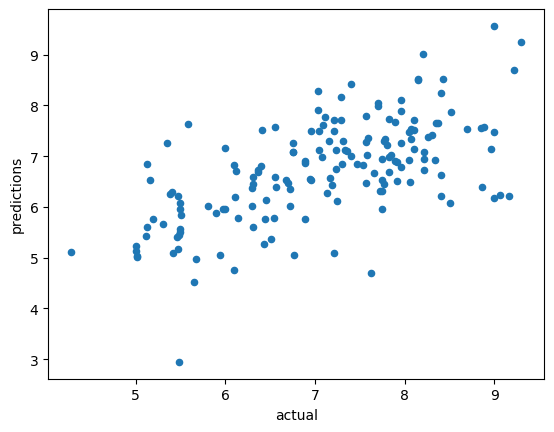

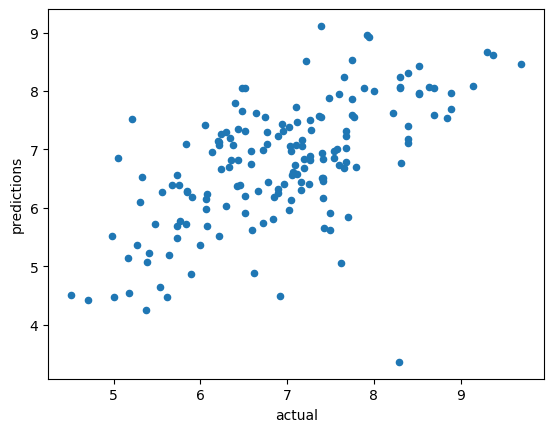

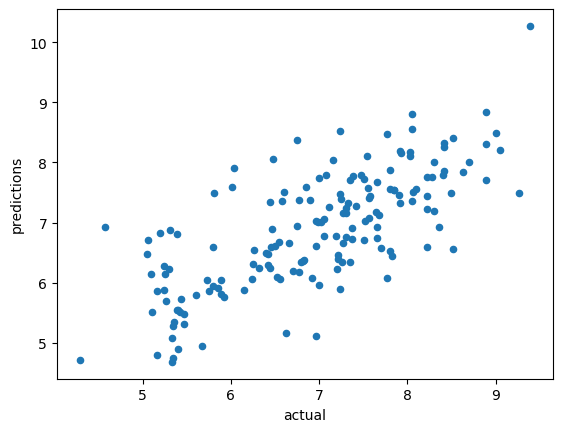

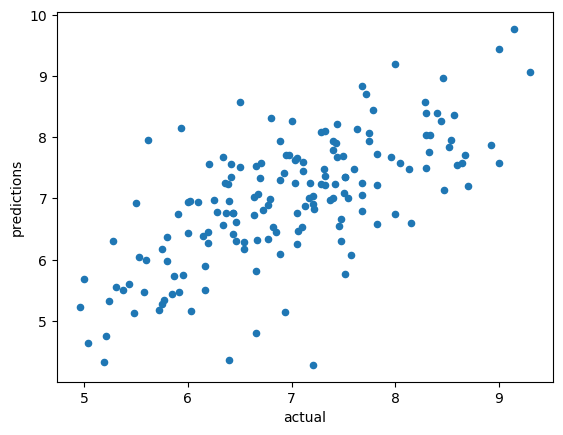

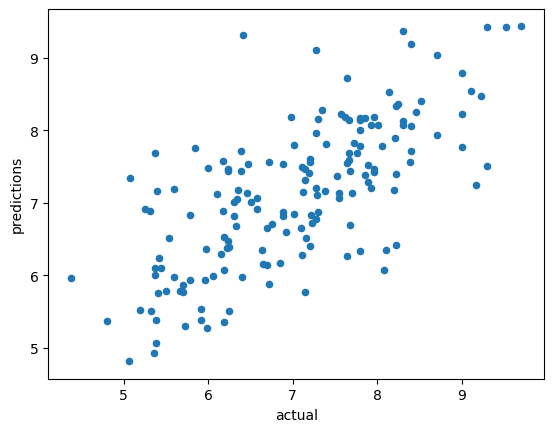

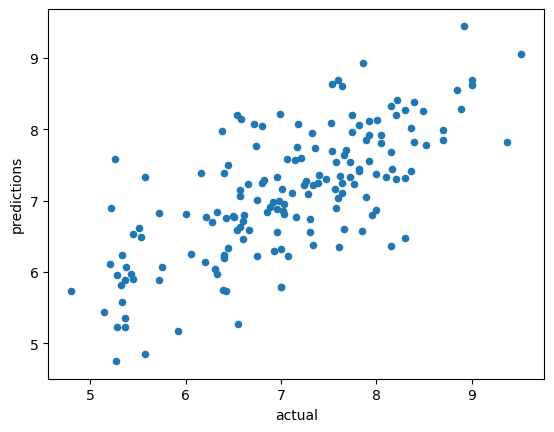

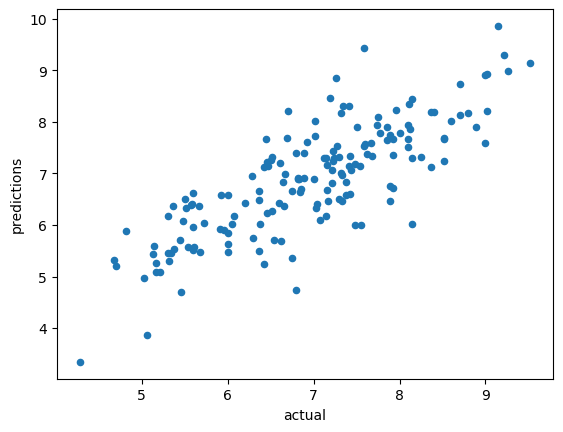

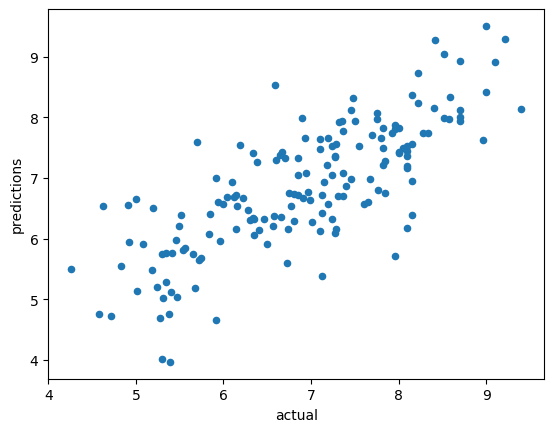

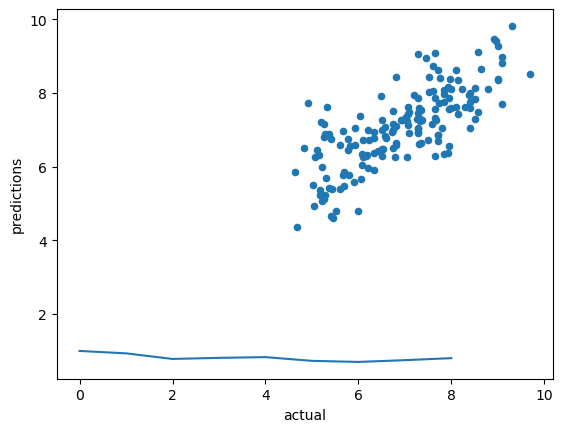

[0.9967570985521437, 0.9313745591972953, 0.7795858696400895, 0.8089330464006805, 0.8292698157012636, 0.7275286450762919, 0.6986495244108075, 0.746391630104865, 0.8011563177478719]


In [14]:
plt.plot(rmse)
plt.show()
print(rmse)

In [15]:
def plot_graphs(data, results_df):
    
    results_df =pd.merge(data, results_df, 
                         left_on="Standardized_SMILES", right_on="Standardized_SMILES")
    
    # Calculate absolute errors and adjust results
    results_df['Error'] = (results_df['True Values'] - results_df['Predictions']).abs().round(2)
    results_df['True Values'] = results_df['True Values'].round(2)
    results_df['Predictions'] = results_df['Predictions'].round(2)

    # Plotting
    plt.figure(figsize=(15, 6))
    plt.scatter(results_df['MolWt'], results_df['Error'], color='blue', marker='o', s=15)
    plt.xlabel('Sorted By MolWt')
    plt.ylabel('Absolute Error')
    plt.xticks(rotation=45)  # Optional: Improve readability of x-axis labels
    plt.grid(True)  # Optional: Adds grid lines for better readability
    plt.show()
    
        # Plotting
    plt.figure(figsize=(15, 6))
    plt.scatter(results_df['QED'], results_df['Error'], color='blue', marker='o', s=15)
    plt.xlabel('Sorted By QED')
    plt.ylabel('Absolute Error')
    plt.xticks(rotation=45)  # Optional: Improve readability of x-axis labels
    plt.grid(True)  # Optional: Adds grid lines for better readability
    plt.show()
    
     # Plotting
    plt.figure(figsize=(15, 6))
    plt.scatter(results_df['LogP'], results_df['Error'], color='blue', marker='o', s=15)
    plt.xlabel('Sorted By LogP')
    plt.ylabel('Absolute Error')
    plt.xticks(rotation=45)  # Optional: Improve readability of x-axis labels
    plt.grid(True)  # Optional: Adds grid lines for better readability
    plt.show()
    
     # Plotting
    plt.figure(figsize=(15, 6))
    plt.scatter(results_df['pchembl_value'], results_df['Error'], color='blue', marker='o', s=15)
    plt.xlabel('Sorted By IC50 Sorted')
    plt.ylabel('Absolute Error')
    plt.xticks(rotation=45)  # Optional: Improve readability of x-axis labels
    plt.grid(True)  # Optional: Adds grid lines for better readability
    plt.show()

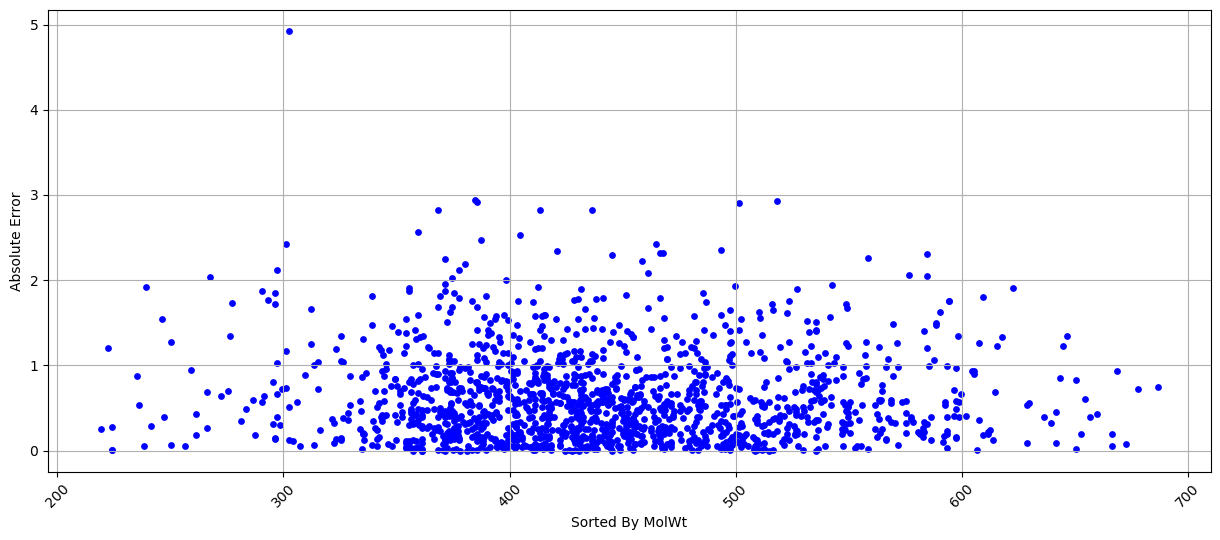

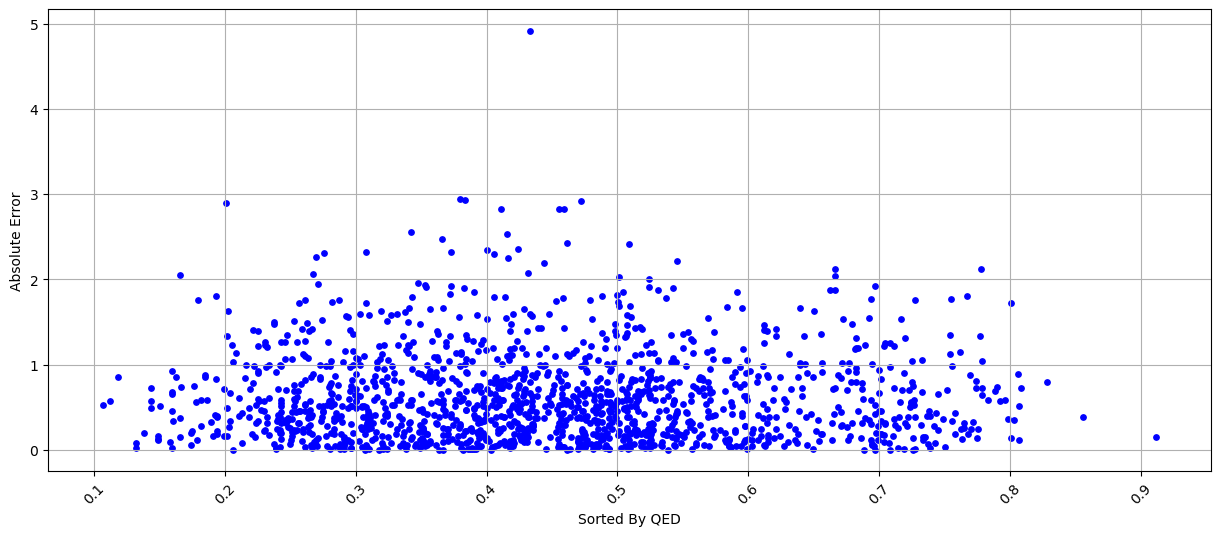

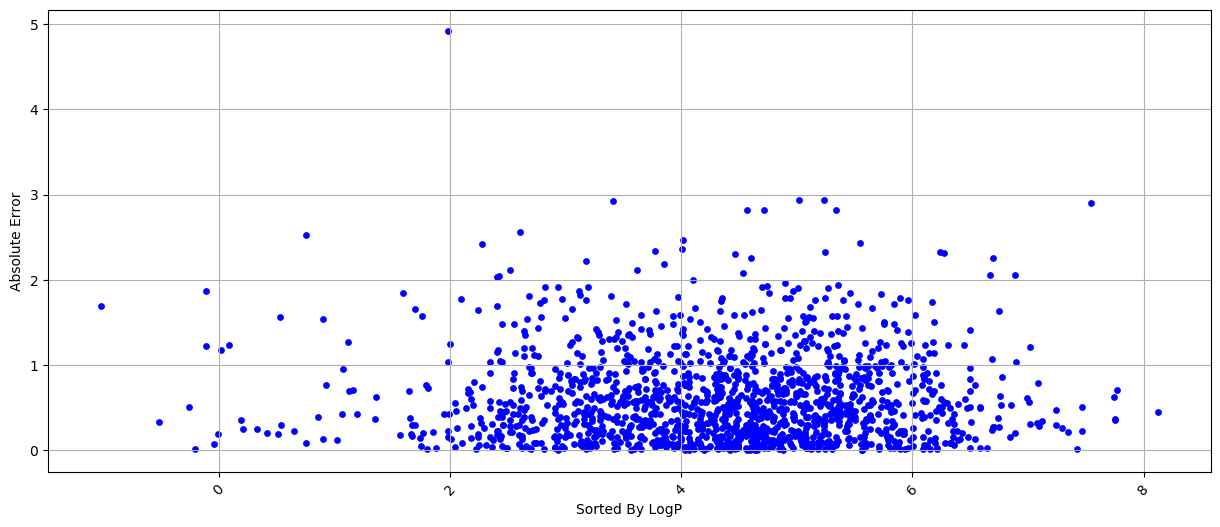

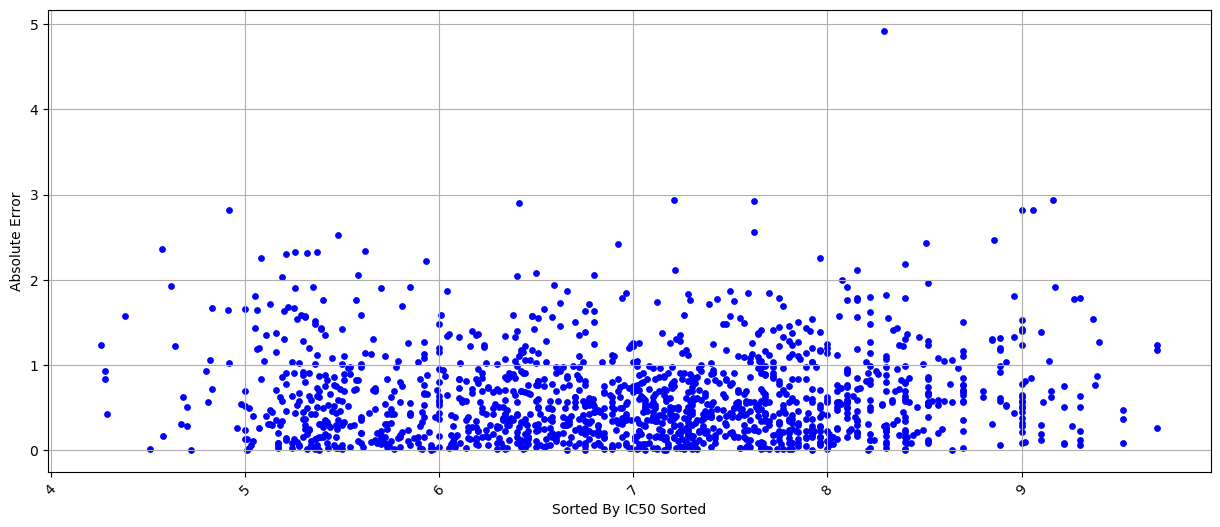

In [16]:
plot_graphs(df, results_df)

In [17]:
import random
df_copy=df.copy().sort_values(by="QED")#regular sort 
df_copy.plot(y="pchembl_value",use_index=False) #probabilities of each molecule being selected upon random selection without replacement
df_copy.plot(y="QED",use_index=False)

indices=df.nlargest(round(len(X)/10), ['QED']).index
X_test=X.copy()[indices]
y_test=y.copy()[indices]
smiles_test=smiles[indices]

X1=np.delete(X.copy(),indices,axis=0)
y1=np.delete(y.copy(),indices,axis=0)
smiles1=np.delete(smiles.copy(),indices,axis=0)


#X[df.nlargest(126, ['QED']).index].shape

In [18]:
#Calculating Discovery metrics on most drug-like candidates

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

def perform_fcv_on_most_druglike(X, y, smiles, k=10, sort_by=None, additional_info=None):
    false_discovery=list()
    true_discovery=list()
    true_ignore=list()
    false_ignore=list()
    rmse=list()
    train_df=pd.DataFrame()
    test_df=pd.DataFrame()
    if sort_by is not None:
        idx = np.argsort(sort_by)
        X, y, smiles = X[idx], y[idx], [smiles[i] for i in idx]
        if additional_info is not None:
            additional_info = [additional_info[i] for i in idx]


    predictions_all = []  # List to store all predictions
    true_values_all = []  # List to store all true values
    smiles_all = []       # List to store SMILES for each test sample
    sort_by_all = []      # List to store sort_by values for each test sample

    total_samples = len(X)
    fold_size = total_samples // k
    remainder = total_samples % k
    threshold=0
    for i in range(k-1):
        start = (i+1) * fold_size
        stop = ((i+1) + 1) * fold_size if (i+2) < k else total_samples
        
        X_train = np.vstack([X[:start]])
        y_train = np.concatenate([y[:start]])
        

        sort_by_test = additional_info[start:stop] if additional_info is not None else y[start:stop]
        
        model = nn.MLPRegressor(hidden_layer_sizes=(min(25,round(np.sqrt(X_train.shape[0])),)), random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(stats.pearsonr(y_test, predictions))
        discoveries=pd.DataFrame({'Standardized_SMILES': smiles_test,'actual':y_test ,'predictions':predictions})
        discoveries.plot.scatter(x="actual",y="predictions",)#gonna subset this
        threshold=5.2 #previous max; discoveries defined as those who are predicted to be more than this
        discoveries=discoveries.query("predictions<@threshold")
        falses=discoveries.query("actual>@threshold")
        trues=discoveries.query("actual<@threshold")
        
        false_discovery.append(falses)
        true_discovery.append(trues)
        
        discoveries=pd.DataFrame({'Standardized_SMILES': smiles_test,'actual':y_test ,'predictions':predictions})#gonna subset this
        threshold=5.2 #previous max; discoveries defined as those who are predicted to be more than this
        discoveries=discoveries.query("predictions>@threshold")
        
        falses=discoveries.query("actual<@threshold")
        trues=discoveries.query("actual>@threshold")
        
        false_ignore.append(falses)
        true_ignore.append(trues)
        
        rmse.append(np.sqrt(mean_squared_error(y_test, predictions))) 
        smiles_train=np.concatenate([smiles[:start]])
        training_df=pd.DataFrame({
            'Standardized_SMILES': smiles_train,
        'True Values': y_train,
        'Predictions': model.predict(X_train)
        })
        
        training_df.insert(0,'training batch',(i+1))
        train_df=pd.concat([train_df,training_df]).reset_index(drop=True)
        testing_df=pd.DataFrame({
            'Standardized_SMILES': smiles_test,
        'True Values': y_test,
        'Predictions': predictions
        })
        testing_df.insert(0,'testing batch',(i+1))
        test_df=pd.concat([test_df,testing_df]).reset_index(drop=True)
        
        
        
        predictions_all.extend(predictions.tolist())
        true_values_all.extend(y_test.tolist())
        smiles_all.extend(smiles_test)
        sort_by_all.extend(sort_by_test)

    
    # Saving to CSV (optional)
    train_df.to_csv("unsorted_fcv_results_MLP_training batches_druglike.csv", index=False)
    test_df.to_csv("unsorted_fcv_results_MLP_testing batches_druglike.csv", index=False)
    results_df = pd.DataFrame({
        'Standardized_SMILES': smiles_all,
        'True Values': true_values_all,
        'Predictions': predictions_all,
        
    })


    # Return the DataFrame for further use or analysis
    return results_df,false_discovery,true_discovery, true_ignore, false_ignore,rmse

In [19]:


results_df2, false_disc2, true_disc2, true_ignore2, false_ignore2,rmse = perform_fcv_on_most_druglike(X1, y1, smiles1, sort_by=None, additional_info=df["QED"])

/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.3406497935577535, 8.07040137883319e-06)


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.4268566462027666, 1.2000208534188505e-08)


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.5148310323984556, 1.756394841959427e-12)


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.4743836732215663, 1.3909820812533812e-10)


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.5555385848709361, 1.1559964828587329e-14)


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.5728198308697912, 1.1059214574921845e-15)


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.5911033137625059, 7.912590342373636e-17)


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.5838188514020444, 2.3082078413242116e-16)


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.5569166296807263, 9.634578767376722e-15)


In [20]:
for i in np.arange(len(true_disc2)):
    print(true_disc2[i].shape)

(7, 3)
(6, 3)
(6, 3)
(6, 3)
(5, 3)
(6, 3)
(7, 3)
(5, 3)
(5, 3)


In [21]:
for i in np.arange(len(true_disc2)):
    print(false_disc2[i].shape)

(47, 3)
(31, 3)
(22, 3)
(30, 3)
(16, 3)
(15, 3)
(15, 3)
(14, 3)
(16, 3)


In [22]:
for i in np.arange(len(true_disc2)):
    print(true_ignore2[i].shape)

(103, 3)
(119, 3)
(128, 3)
(120, 3)
(134, 3)
(135, 3)
(135, 3)
(136, 3)
(134, 3)


In [23]:
for i in np.arange(len(true_disc2)):
    print(false_ignore2[i].shape)

(5, 3)
(6, 3)
(6, 3)
(6, 3)
(7, 3)
(6, 3)
(5, 3)
(7, 3)
(7, 3)


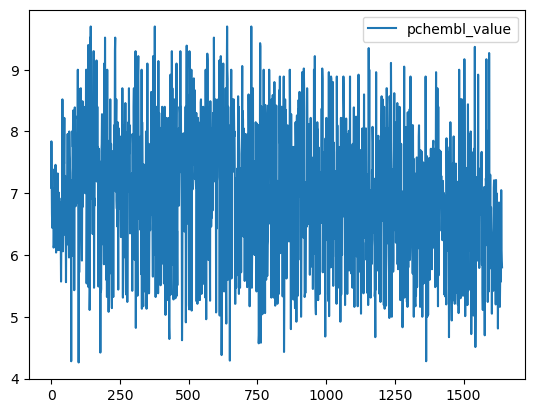

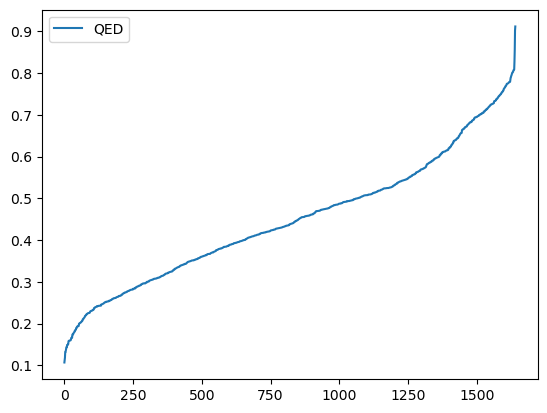

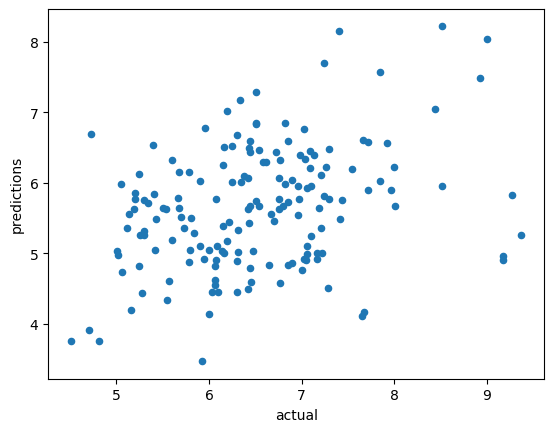

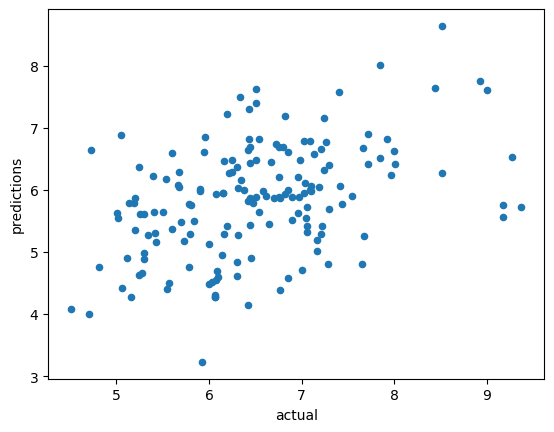

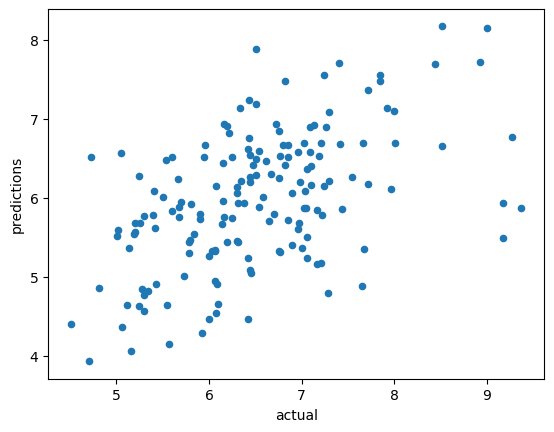

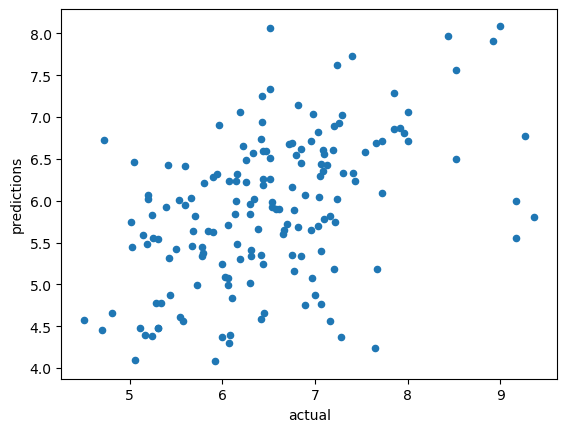

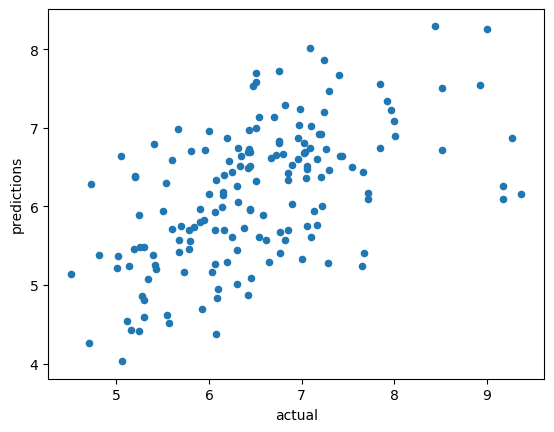

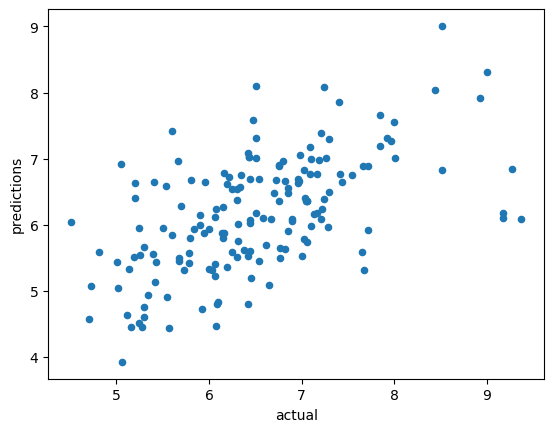

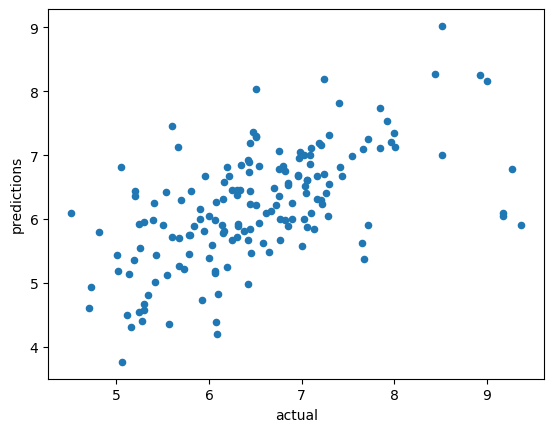

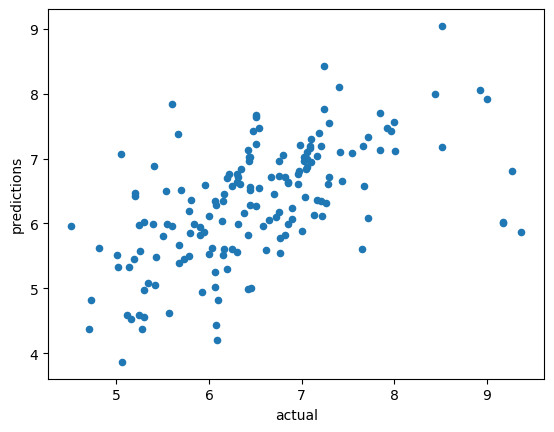

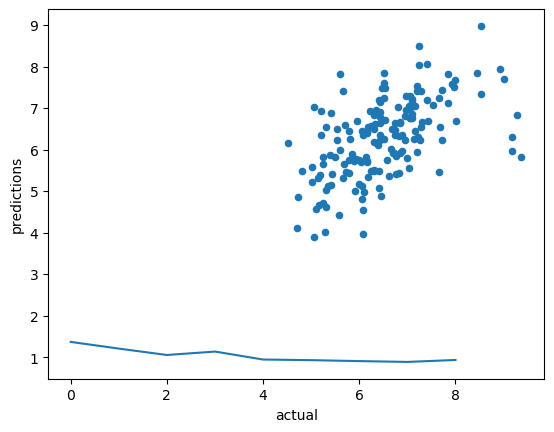

[1.3668960137738908, 1.2057283763717854, 1.0517763108360587, 1.13396562841757, 0.9422497068297406, 0.927072274938092, 0.9044496264218846, 0.8845714433235441, 0.9316028856027843]


In [24]:
plt.plot(rmse)
plt.show()
print(rmse)